<a href="https://colab.research.google.com/github/thanaphornkanking/test/blob/main/%E0%B8%A5%E0%B8%AD%E0%B8%87%E0%B9%80%E0%B8%97%E0%B8%AA_part_%E0%B9%82%E0%B8%A1%E0%B9%80%E0%B8%94%E0%B8%A5_%E0%B9%80%E0%B8%A3%E0%B8%B22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd
import numpy as np

In [28]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
/content/efficientnet_keras_transfer_learning


In [29]:
df = pd.read_csv (r'/content/drive/MyDrive/รูปรถทั้งหมด(old)/id_all_car992.csv')
df

,no,id,Degree,Part,Path_Name
0,1,id2,Base,p01,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id2/B...
1,2,id2,Base,p01,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id2/B...
2,3,id2,Base,p01,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id2/B...
3,4,id2,Base,p01,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id2/B...
4,5,id2,Base,p01,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id2/B...
...,...,...,...,...,...
200610,200611,id99,Severe,p15,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id99/...
200611,200612,id99,Severe,p15,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id99/...
200612,200613,id99,Severe,p15,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id99/...
200613,200614,id99,Severe,p15,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id99/...


In [30]:
import sys
sys.path.append('/content/drive/MyDrive/Model/test/part_id14(300).h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [31]:
#load model
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Model/test/part_id14(300).h5')
height = width = model.input_shape[1]

In [32]:
base_dir = '/content/drive/MyDrive/รูปรถทั้งหมด(old)/id99'
os.makedirs(base_dir, exist_ok=True)

train_dir = os.path.join(base_dir, 'Minor')
os.makedirs(train_dir, exist_ok=True)
test_dir = os.path.join(base_dir, 'Base')
os.makedirs(test_dir, exist_ok=True)

In [33]:
train = df[df['no'].between(11819,23647)]
test = df[df['no'].between(1,11818)]

In [34]:
test

,no,id,Degree,Part,Path_Name
0,1,id2,Base,p01,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id2/B...
1,2,id2,Base,p01,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id2/B...
2,3,id2,Base,p01,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id2/B...
3,4,id2,Base,p01,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id2/B...
4,5,id2,Base,p01,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id2/B...
...,...,...,...,...,...
11813,11814,id2,Base,p15,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id2/B...
11814,11815,id2,Base,p15,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id2/B...
11815,11816,id2,Base,p15,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id2/B...
11816,11817,id2,Base,p15,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id2/B...


In [35]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train,
        directory = train_dir,
        x_col = 'Path_Name',
        y_col = 'Part',
        # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        target_size=(height, width),
        batch_size=batch_size,
        class_mode='categorical')


#label
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 11829 validated image filenames belonging to 15 classes.
{0: 'p01', 1: 'p02', 2: 'p03', 3: 'p04', 4: 'p05', 5: 'p06', 6: 'p07', 7: 'p08', 8: 'p09', 9: 'p10', 10: 'p11', 11: 'p12', 12: 'p13', 13: 'p14', 14: 'p15'}


In [36]:
act = test['Part'].tolist() #ค่าจริง
path = test['Path_Name'].tolist() #path

In [37]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path): #สร้างฟังก์ชัน
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตาม พารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img) # model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [38]:
predict_image(path[0])[0]

1/1 [==============================] - 2s 2s/step


0.43614623

In [39]:
import numpy as np

In [40]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
1/1 [==============================] - 0s 50ms/step


In [41]:
pred_list

['p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p13',
 'p01',
 'p01',
 'p13',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p13',
 'p01',
 'p01',
 'p13',
 'p01',
 'p01',
 'p01',
 'p13',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p13',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p13',
 'p01',
 'p01',
 'p01',
 'p01',
 'p13',
 'p01',
 'p13',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p13',
 'p01',
 'p01',
 'p01',
 'p01',
 'p13',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p13',
 'p13',
 'p01',
 'p01',
 'p13',
 'p01',
 'p01',
 'p13',
 'p14',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p14',
 'p01',
 'p01',
 'p01',
 'p01',
 'p13',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p13',
 'p01',
 'p01',
 'p01',
 'p01',
 'p13',
 'p01',
 'p01',
 'p01',
 'p01',
 'p13',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',
 'p01',


In [42]:
pred = np.array(pred_list)
act = np.array(act)

In [43]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 66.9487222880352%
              precision    recall  f1-score   support

         p01       1.00      0.89      0.94       891
         p02       1.00      1.00      1.00       891
         p03       0.00      0.00      0.00       891
         p04       0.50      1.00      0.67       891
         p05       1.00      0.21      0.34       891
         p06       0.56      0.99      0.72       891
         p07       0.50      0.00      0.00       891
         p08       0.50      1.00      0.67       891
         p09       1.00      1.00      1.00       198
         p10       1.00      1.00      1.00        27
         p11       0.50      1.00      0.66       891
         p12       0.91      0.01      0.02       891
         p13       0.74      0.66      0.70       891
         p14       0.71      0.86      0.78       891
         p15       1.00      1.00      1.00       901

    accuracy                           0.67     11818
   macro avg       0.73      0.71      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 76.24999999999999, 'Predicted label')

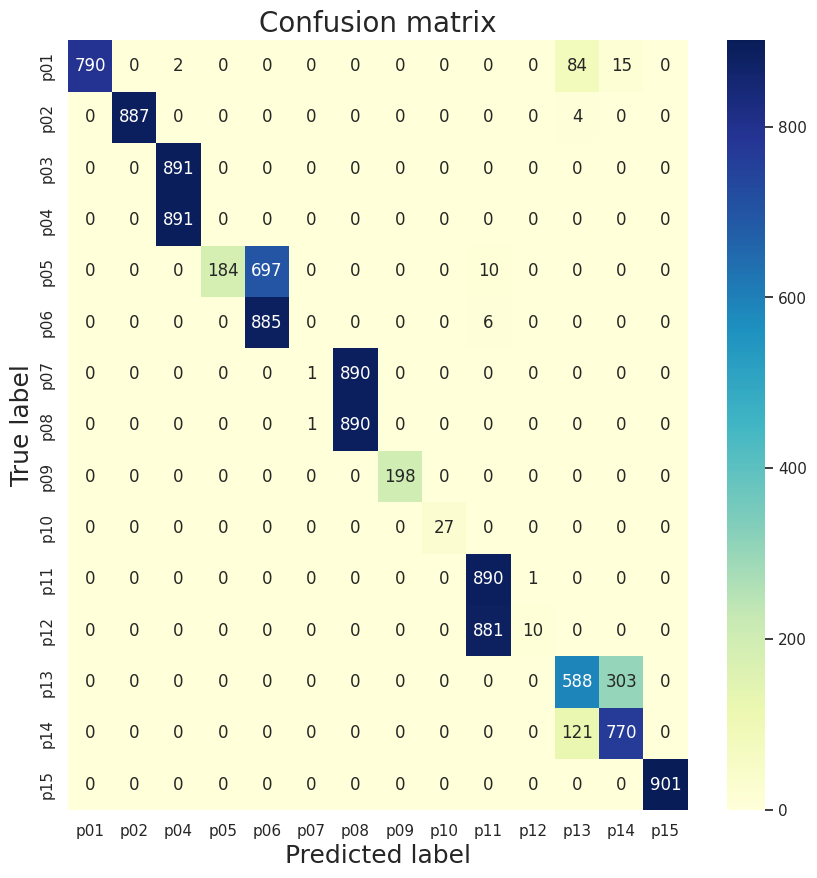

In [44]:
#create CF
data = {'Actual': act,'Predicted' : pred}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)